## CHEME 6880 Homework 3 
Net ID : AF626

### Problem 1
Implement the K-means algorithm using any programming language (e.g. MATLAB or Python),
and apply it to the dataset ‘hw4-data-kmeans.xlsx’ which is provided.<br>
(a) Initialize the K-means algorithm with means [1 2] and [-2 -1.5]. Plot the assignment for
each data point, the center location and the objective value in each iteration. How many
iterations are needed for convergence?<br>
(b) Try more clusters (K>2) and different initial mean values in the K-means algorithm, and
show that the performance K-means algorithm is affected by initial choice of solutions.<br>
Note: In this problem, you are expected to develop codes for the clustering algorithm. Your
calculation process should be presented in sufficient details, ideally step-by-step. You could use
any basic calculation/computing tools (e.g. NumPy, MATLAB without toolboxes, etc.) to facilitate
your calculation process. If only the final clustering results are presented without necessary
intermediate steps and results, you will not get most of the credit.

#### Solution

(a) Initialize the K-means algorithm with means [1 2] and [-2 -1.5]. Plot the assignment for
each data point, the center location and the objective value in each iteration. How many
iterations are needed for convergence?<br>

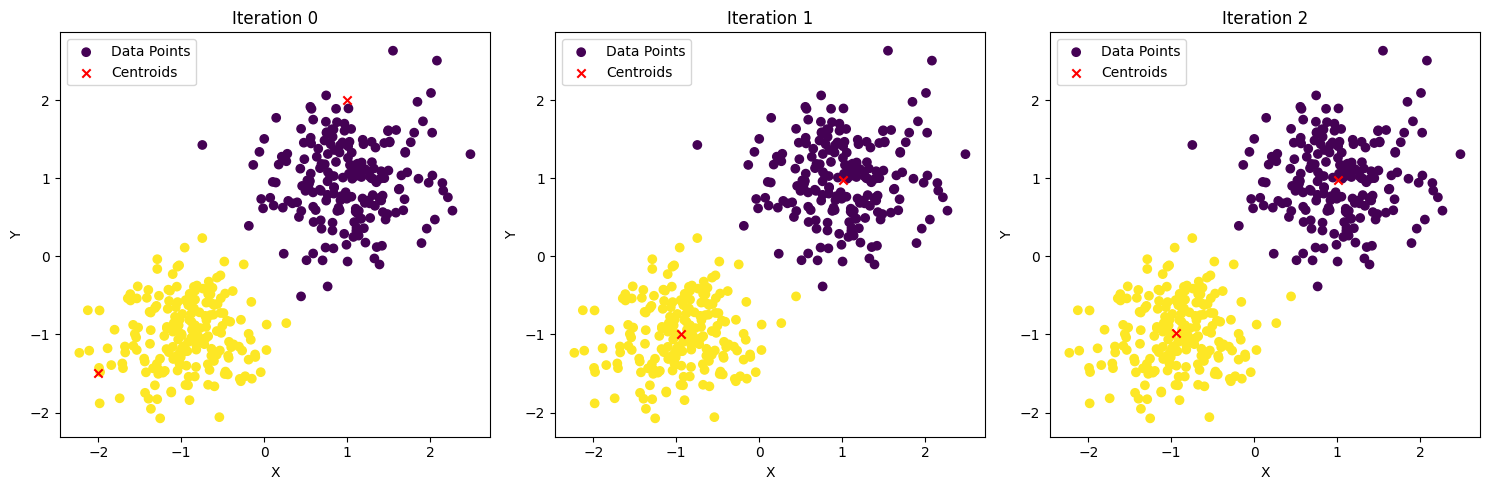

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from CSV file
data_1 = pd.read_csv('data/hw4-data-kmeans.csv')

# Extract X and Y coordinates from the DataFrame
data_points = data_1[['x', 'y']].values

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to initialize centroids with provided means
def initialize_centroids(initial_means):
    return np.array(initial_means)

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

# Function to update centroids based on mean of data points in each cluster
def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
        else:
            centroids[i] = data[np.random.choice(len(data))]
    return centroids

# Function to perform K-means clustering
def k_means(data, initial_means, k, max_iterations=100):
    centroids = initialize_centroids(initial_means)
    cluster_history = []
    centroid_history = [centroids.copy()]
    for _ in range(max_iterations):
        prev_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        cluster_history.append(clusters)
        centroid_history.append(centroids.copy())
        if np.all(prev_centroids == centroids):
            break
    return cluster_history, centroid_history

# Perform K-means clustering with K=2 and provided initial means
initial_means = [[1, 2], [-2, -1.5]]
k = 2
cluster_history, centroid_history = k_means(data_points, initial_means, k)

# Plot all the iterations in a grid
num_iterations = len(cluster_history)  # Corrected number of iterations
num_cols = 3  # Number of columns in the grid
num_rows = (num_iterations + num_cols - 1) // num_cols  # Calculate number of rows

plt.figure(figsize=(15, 5 * num_rows))  # Set figure size based on number of rows

for i in range(num_iterations):
    clusters = cluster_history[i]
    centroids = centroid_history[i]
    
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplot
    plt.scatter(data_points[:, 0], data_points[:, 1], c=clusters, cmap='viridis', label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', label='Centroids')
    plt.title(f'Iteration {i}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

(b) Try more clusters (K>2) and different initial mean values in the K-means algorithm, and
show that the performance K-means algorithm is affected by initial choice of solutions.

Plotting for Initial Means Set 1


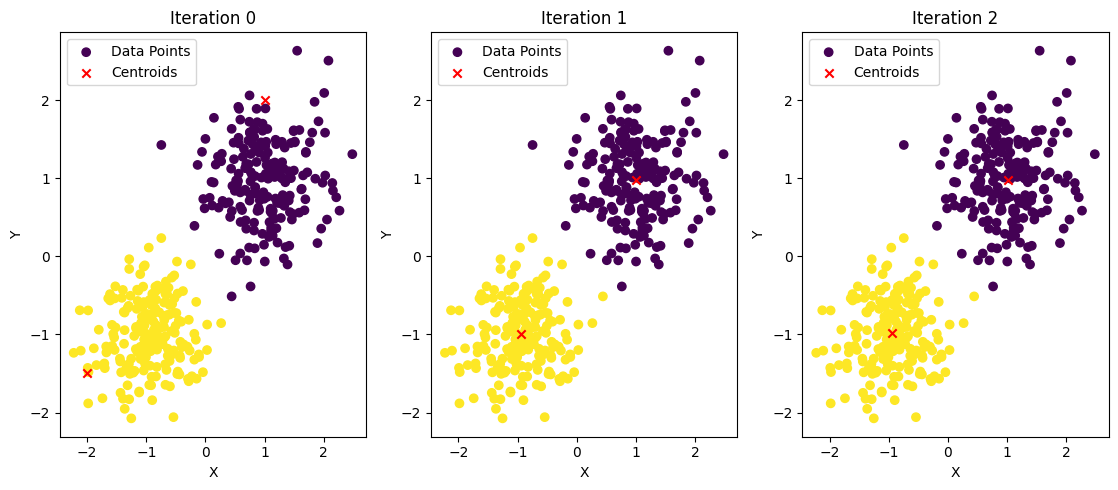

Plotting for Initial Means Set 2


IndexError: list index out of range

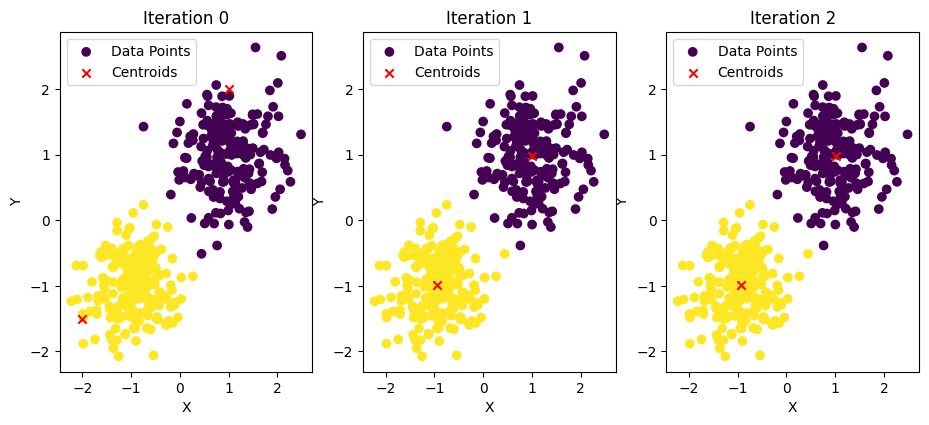

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from CSV file
data_1 = pd.read_csv('data/hw4-data-kmeans.csv')

# Extract X and Y coordinates from the DataFrame
data_points = data_1[['x', 'y']].values

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to initialize centroids with provided means
def initialize_centroids(initial_means):
    return np.array(initial_means)

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    clusters = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
        clusters[i] = np.argmin(distances)
    return clusters

# Function to update centroids based on mean of data points in each cluster
def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
        else:
            centroids[i] = data[np.random.choice(len(data))]
    return centroids

# Function to calculate the objective function value
def calculate_objective_function(data, clusters, centroids):
    obj_function = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[clusters == i]
        obj_function += np.sum((cluster_points - centroid) ** 2)
    return obj_function

# Function to perform K-means clustering
def k_means(data, initial_means, max_iterations=100):
    k = len(initial_means)
    centroids = initialize_centroids(initial_means)
    cluster_history = []
    centroid_history = [centroids.copy()]
    for _ in range(max_iterations):
        prev_centroids = centroids.copy()
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(data, clusters, k)
        cluster_history.append(clusters.copy())  # Update cluster history
        centroid_history.append(centroids.copy())  # Update centroid history
        if np.all(prev_centroids == centroids):
            break
    objective_function = calculate_objective_function(data, clusters, centroids)
    return clusters, centroids, len(cluster_history), objective_function

# Define a list of different initial means
initial_means_list = [
    [[1, 2], [-2, -1.5]],  
    [[2, 2], [-1, -2], [3, -1]],
    [[1, 2],[2, 2], [-1, -2], [3, -1]]]


# Create an empty DataFrame to store results
results_list = []

# Iterate over each set of initial means
for idx, initial_means in enumerate(initial_means_list, 1):
    clusters, centroids, iterations, obj_function = k_means(data_points, initial_means)
    
    # Append results to list
    results_list.append({'Number of Clusters': len(initial_means),
                         'Initial Means': initial_means,
                         'Objective Function': obj_function,
                         'Iterations to Converge': iterations})

    # Plotting code (same as before)
    print(f"Plotting for Initial Means Set {idx}")
    num_iterations = iterations  # Update the number of iterations
    num_cols = 4  # Changed to fit 4 subplots in one row
    num_rows = (num_iterations + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))

    for i in range(num_iterations):
        clusters = cluster_history[i]
        centroids = centroid_history[i]

        plt.subplot(num_rows, num_cols, i + 1)
        plt.scatter(data_points[:, 0], data_points[:, 1], c=clusters, cmap='viridis', label='Data Points')
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', label='Centroids')
        plt.title(f'Iteration {i}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)
results_df